## Assignment 8 on Plotting 
### Seaborn

Home exercises. Note that you may need to also use pandas to answer some of the questions. 

1. Create a *lineplot* showing how **Study Time** varies by **Student Name**. Which student has the highest study time?

2. Plot a histogram (*histplot*) of **Grade** and determine which grade range has the highest frequency of students.

3. Create an ECDF plot (*ecdfplot*) for **Grade**. What is the percentage of students scoring less than 85?

4. Create a *stripplot* showing **Grade** distribution for each **Course**. Which course has the most spread in grades?

5. Create a *swarmplot* to show the relationship between Gender and **Study Time**. Which gender has a higher average study time?

6. Plot a *pointplot* to show the average **Grade** for each Course. Which course has the highest average grade?

In [1]:
import pandas as pd
import numpy as np

data = {
    'Student Name': ['Amelie', 'Edgar', 'Jordi', 'Marçal', 'Pep', 'Jaume', 'Marco', 
                     'Ludmila', 'Bastian', 'Marc', 'Gerardo', 'Javier', 'Frank', 'Julia'],
    'Course': ['Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science', 'Cloud Computing', 'Computer Vision', 
               'Artificial Intelligence', 'Python for Data Science'],
    'Grade': [85, 92, 78, 88, 91, 84, 73, 95, 90, 80, 85, 87, 89, 92],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female'],
    'Study Time': [15, 20, 10, 8, 18, 14, 11, 16, 19, 13, 16, 12, 17, 15],
    'Age': [22, 21, 23, 22, 20, 24, 22, 21, 23, 21, 22, 22, 21, 20]
}

df = pd.DataFrame(data)
df

,Student Name,Course,Grade,Gender,Study Time,Age
0,Amelie,Artificial Intelligence,85,Female,15,22
1,Edgar,Python for Data Science,92,Male,20,21
2,Jordi,Cloud Computing,78,Male,10,23
3,Marçal,Computer Vision,88,Male,8,22
4,Pep,Artificial Intelligence,91,Male,18,20
5,Jaume,Python for Data Science,84,Male,14,24
6,Marco,Cloud Computing,73,Male,11,22
7,Ludmila,Computer Vision,95,Female,16,21
8,Bastian,Artificial Intelligence,90,Male,19,23
9,Marc,Python for Data Science,80,Male,13,21


#### Exercise 1. Lineplot showing how Study Time Varies by Student Name

It is to be noted that this plot has no real meaning as there is no real correlation between names (and their starting character) versus study time, from a common sense view

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df.sort_values(by='Study Time', ascending=True, inplace=True)
df

,Student Name,Course,Grade,Gender,Study Time,Age
3,Marçal,Computer Vision,88,Male,8,22
2,Jordi,Cloud Computing,78,Male,10,23
6,Marco,Cloud Computing,73,Male,11,22
11,Javier,Computer Vision,87,Male,12,22
9,Marc,Python for Data Science,80,Male,13,21
5,Jaume,Python for Data Science,84,Male,14,24
0,Amelie,Artificial Intelligence,85,Female,15,22
13,Julia,Python for Data Science,92,Female,15,20
7,Ludmila,Computer Vision,95,Female,16,21
10,Gerardo,Cloud Computing,85,Male,16,22


c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


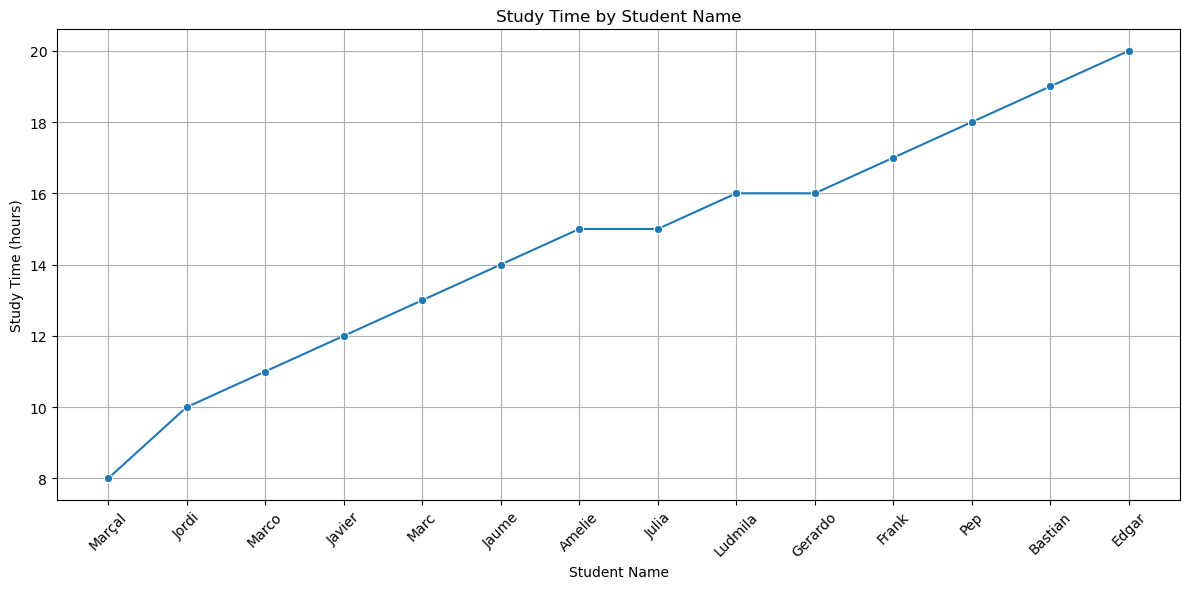

In [3]:
# Create a lineplot for Study Time by Student Name
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Student Name', y='Study Time', marker='o')
plt.title('Study Time by Student Name')
plt.xlabel('Student Name')
plt.ylabel('Study Time (hours)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [4]:
# Identify the student with the highest study time
max_student_time = df.loc[df['Study Time'].idxmax(), ['Student Name', 'Study Time']]
max_student_time

Student Name    Edgar
Study Time         20
Name: 1, dtype: object

#### Exercise 2: Plot a histogram (*histplot*) for Grades

c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


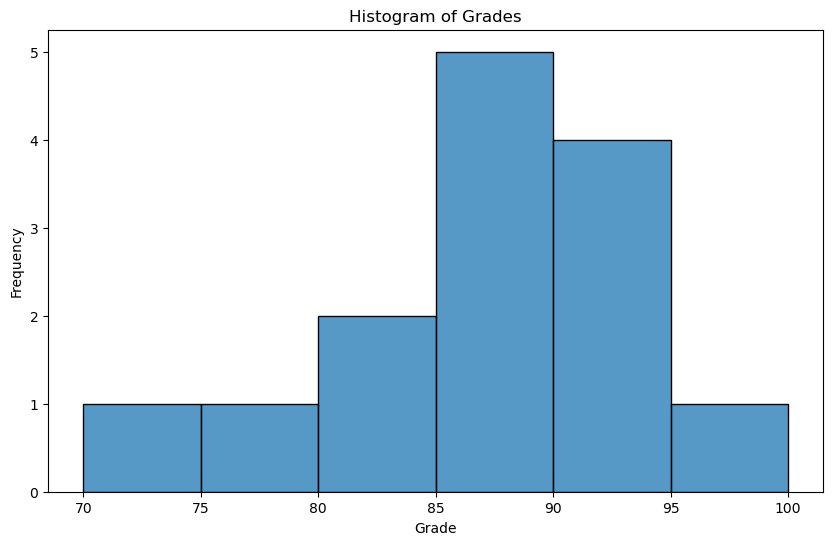

In [5]:
# Define bins with intervals of 5 for equal range of bins
bins = [70, 75, 80, 85, 90, 95, 100]

# Create a histogram with custom bins
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Grade', bins=bins)
plt.title('Histogram of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')

plt.show()


In [6]:
# Determine bins value counts
bin_freq = pd.cut(df['Grade'], bins=bins).value_counts()
bin_freq

Grade
(85, 90]     4
(90, 95]     4
(80, 85]     3
(75, 80]     2
(70, 75]     1
(95, 100]    0
Name: count, dtype: int64

#### However, the above is results is what we consider an edge case because students whose grade who falls exactly on the split of the bin may be double counted in the graphical representation. We have to look at the bin value counts to determine that actually there are 2 grade ranges with highest frequency.

Since the question wanted a histogram plot, there is no point trying to change the grade variable from a continuous variable plotting to discrete variable plotting

Therefore, let us change the bin intervals such that the start and end limits of the highest frequency bins do not coincide with any student's grades. (But we see that it is not possible later no matter how the interval of the bins are changed)

In [7]:
df.sort_values(by='Grade', ascending=True, inplace=True)
df

,Student Name,Course,Grade,Gender,Study Time,Age
6,Marco,Cloud Computing,73,Male,11,22
2,Jordi,Cloud Computing,78,Male,10,23
9,Marc,Python for Data Science,80,Male,13,21
5,Jaume,Python for Data Science,84,Male,14,24
0,Amelie,Artificial Intelligence,85,Female,15,22
10,Gerardo,Cloud Computing,85,Male,16,22
11,Javier,Computer Vision,87,Male,12,22
3,Marçal,Computer Vision,88,Male,8,22
12,Frank,Artificial Intelligence,89,Male,17,21
8,Bastian,Artificial Intelligence,90,Male,19,23


From here, I decided to change the bin interval from 5 to 10, making it more interpretable rather than a random interval like 6

c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


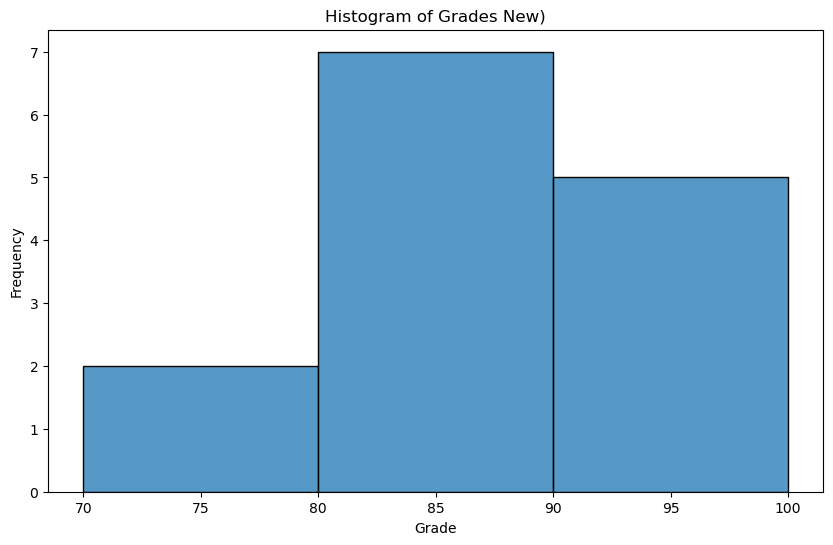

In [ ]:
new_bins = range(70, 101, 10) 

# Create a histogram with the new bins
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Grade', bins=new_bins)
plt.title('Histogram of Grades New)')
plt.xlabel('Grade')
plt.ylabel('Frequency')

plt.show()

In [11]:
# Calculate frequency for the new_bins
new_bins = pd.cut(df['Grade'], bins=new_bins).value_counts()
new_bins

Grade
(80, 90]     7
(90, 100]    4
(70, 80]     3
Name: count, dtype: int64

Therefore the grade range with highest frequency of students is (80 to 90] with 7 counts.
As mentioned above, the double counting still is in the graph, and we eventually still have to print value_counts to determine the final answer.
However, at least this final answer is clear.

#### Exercise 3: Create an ECDF plot (*ecdfplot*) for Grade. What is the percentage of students scoring less than 85?

c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


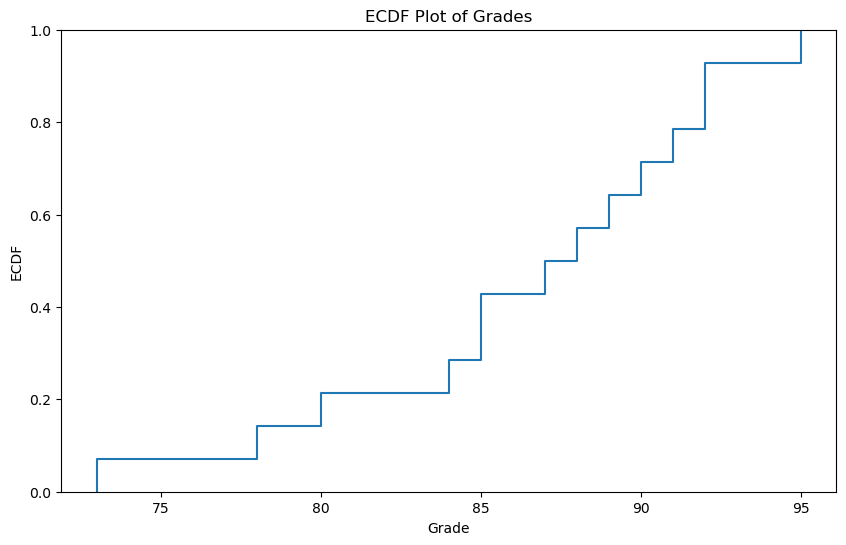

In [12]:
# Create an ECDF plot for Grade
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x="Grade")
plt.title('ECDF Plot of Grades')
plt.xlabel('Grade')
plt.ylabel('ECDF')

plt.show()

In [13]:
# Calculate the percentage of students scoring less than 85
pct_below_85 = (df['Grade'] < 85).sum() / len(df) * 100
pct_below_85

28.57142857142857

From the graph above, we can see that the percentage is roughly about 30%. We further confirm by calculating the percentage, showing 28.5%

#### Exercise 4: Create a *stripplot* showing Grade distribution for each Course. Which course has the most spread in grades?

C:\Users\acer\AppData\Local\Temp\ipykernel_22832\2304768113.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='Course', y='Grade', palette='Set1')
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


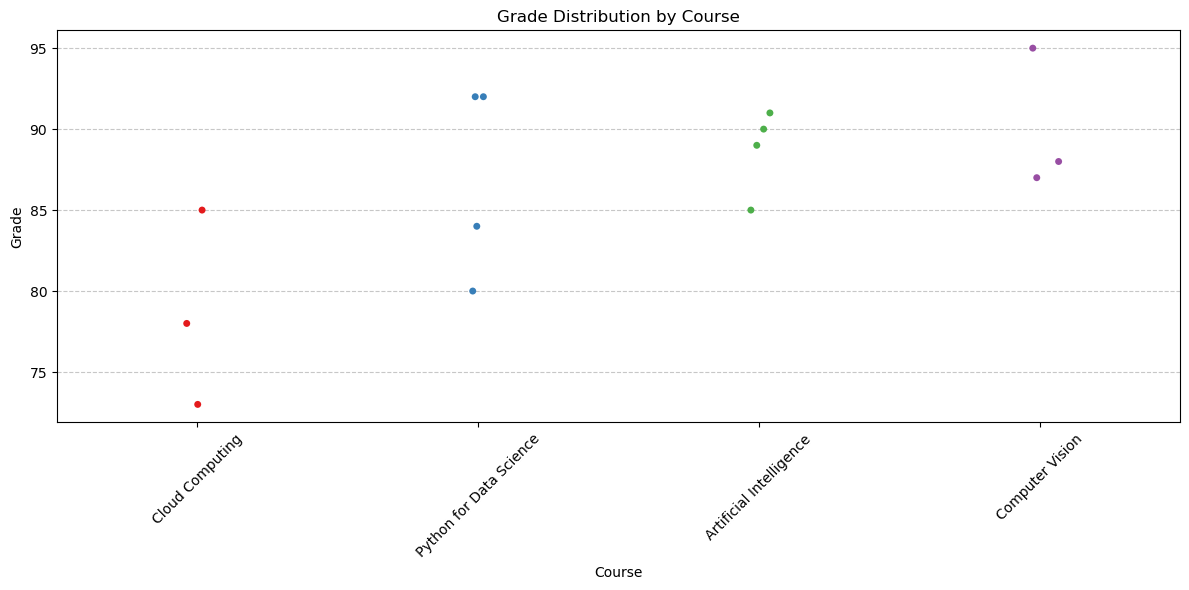

In [17]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x='Course', y='Grade', palette='Set1')
plt.title('Grade Distribution by Course')
plt.xlabel('Course')
plt.ylabel('Grade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# Calculate the spread (range) of grades for each course
grade_spread = df.groupby('Course')['Grade'].agg(lambda x: x.max() - x.min())
grade_spread


Course
Artificial Intelligence     6
Cloud Computing            12
Computer Vision             8
Python for Data Science    12
Name: Grade, dtype: int64

From above stripplot, we can intuitively see that it is Cloud Computing and Python for Data Science with the highest grade spread. However we confirm this by calculating the grade_spread variable using the lambda and groupby commands we learnt from previous classes.

#### Exercise 5: Create a *swarmplot* to show the relationship between Gender and Study Time. Which gender has a higher average study time?

C:\Users\acer\AppData\Local\Temp\ipykernel_22832\278448201.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, x='Gender', y='Study Time', palette='Set2')
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


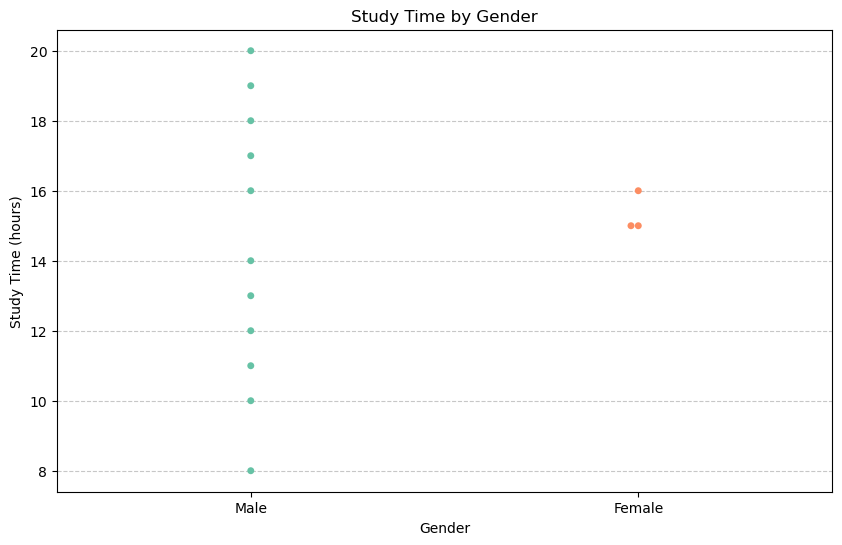

In [ ]:
# Create a swarmplot for Gender vs. Study Time
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df, x='Gender', y='Study Time', palette='Set2')
plt.title('Study Time by Gender')

plt.ylabel('Study Time (hours)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


From the above swarmplot it is difficult to determine the average (mean), although we can see the range and probably median. We shall calculate the average for each gender below, and we confirm that females study more on average with 15.33 hours

In [24]:
mean_study_time = df.groupby('Gender')['Study Time'].mean()
mean_study_time

Gender
Female    15.333333
Male      14.363636
Name: Study Time, dtype: float64

#### Exercise 6: Plot a *pointplot* to show the average Grade for each Course. Which course has the highest average grade?

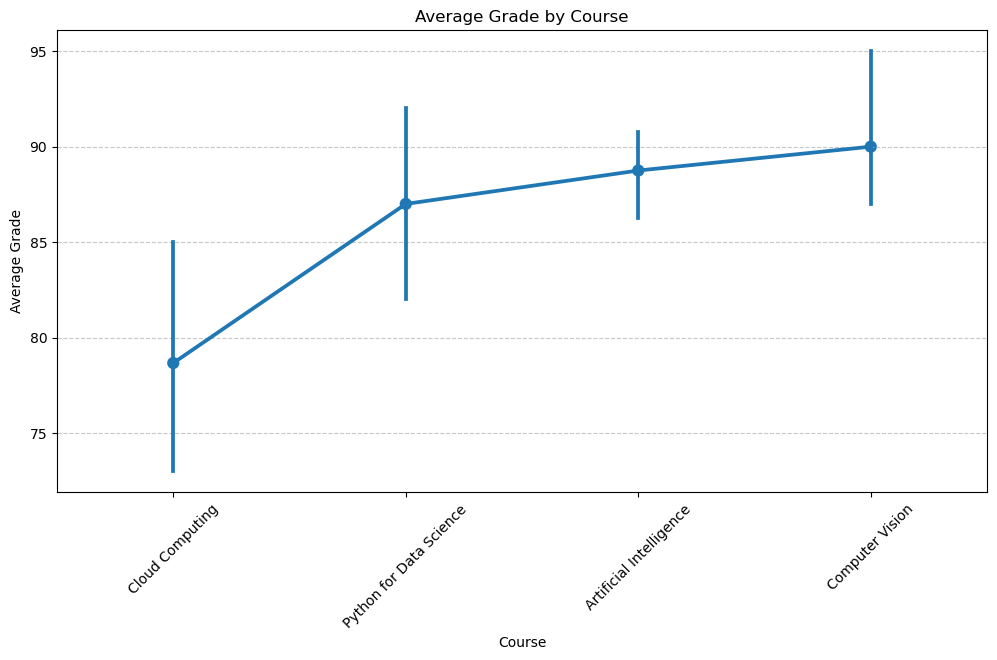

In [25]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='Course', y='Grade')
plt.title('Average Grade by Course')
plt.xlabel('Course')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

We can see the highest average grade is around 90 for Computer Vision course. 
But just to be sure and very exact, we also calculate the statistics below:

In [26]:
# Calculate the average grade for each course
average_grade = df.groupby('Course')['Grade'].mean()
average_grade

Course
Artificial Intelligence    88.750000
Cloud Computing            78.666667
Computer Vision            90.000000
Python for Data Science    87.000000
Name: Grade, dtype: float64

We confirm that the average grade for Computer vision course is 90.00!